In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("D:\DATA SC_Practice Project\p1\happiness_score_dataset.csv")#REading the data
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [4]:
#replacing zero values with the mean of the column
data['Economy (GDP per Capita)'] = data['Economy (GDP per Capita)'].replace(0,data['Economy (GDP per Capita)'].mean())
data['Family'] = data['Family'].replace(0,data['Family'].mean())
data['Health (Life Expectancy)'] = data['Health (Life Expectancy)'].replace(0,data['Health (Life Expectancy)'].mean())
data['Freedom'] = data['Freedom'].replace(0,data['Freedom'].mean())
data['Trust (Government Corruption)'] = data['Trust (Government Corruption)'].replace(0,data['Trust (Government Corruption)'].mean())
data['Generosity'] = data['Generosity'].replace(0,data['Generosity'].mean())

In [5]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.851493,0.997318,0.634248,0.431328,0.144330,0.238797,2.098977
std,45.754363,1.145010,0.017146,0.397388,0.260556,0.241870,0.146734,0.119484,0.125252,0.553550
min,1.000000,2.839000,0.018480,0.015300,0.139950,0.047760,0.076990,0.002270,0.001990,0.328580
25%,40.250000,4.526000,0.037268,0.557532,0.861422,0.447215,0.329603,0.062550,0.154913,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.108770,0.217155,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
#Data describe method doesn't show categorical state, we use isna() to check nulls
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [8]:
data.sort_values(by="Happiness Rank", ascending=True).head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [9]:
data.sort_values(by="Happiness Rank", ascending=False).head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


In [10]:
Region = data.groupby('Region')

In [11]:
Region['Happiness Score'].describe().sort_values(by="mean",ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


In [12]:
data[data["Region"]=="North America"].head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [13]:

Reg_SSA = data[data['Region'] == 'Sub-Saharan Africa']
Reg_SA = data[data['Region'] == 'Southern Asia']
Reg_CEE = data[data['Region'] == 'Central and Eastern Europe']
Reg_MENA = data[data['Region'] == 'Middle East and Northern Africa']
Reg_EA = data[data['Region'] == 'Eastern Asia']
Reg_Lac = data[data['Region'] == 'Latin America and Caribbean']
Reg_WE = data[data['Region'] == 'Western Europe']
Reg_NA = data[data['Region'] == 'North America']
Reg_ANZ = data[data['Region'] == 'Australia and New Zealand']

In [14]:
len(Reg_SSA[Reg_SSA['Happiness Score'] > 6])

0

In [15]:
len(Reg_SA[Reg_SA['Happiness Score'] > 6])

0

In [16]:
len(Reg_CEE[Reg_CEE['Happiness Score'] > 6])

2

In [17]:
len(Reg_MENA[Reg_MENA['Happiness Score'] > 6])

6

In [18]:
len(Reg_EA[Reg_EA['Happiness Score'] > 6])

1

In [19]:
len(Reg_Lac[Reg_Lac['Happiness Score'] > 6])

13

In [20]:
len(Reg_WE[Reg_WE['Happiness Score'] > 6])

16

In [21]:
len(Reg_NA[Reg_NA['Happiness Score'] > 6])

2

In [22]:
len(Reg_ANZ[Reg_ANZ['Happiness Score'] > 6])

2

In [23]:
import warnings
warnings.simplefilter("ignore")


<AxesSubplot:>

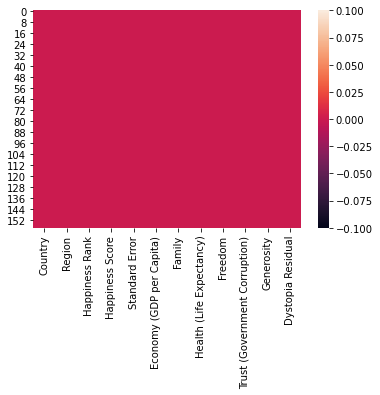

In [24]:
# there are no null values in the dataset.
sns.heatmap(data.isna())

In [25]:
X = data.drop(columns = ['Country','Region'])
y = data[['Country','Region']]
y

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
153,Rwanda,Sub-Saharan Africa
154,Benin,Sub-Saharan Africa
155,Syria,Middle East and Northern Africa
156,Burundi,Sub-Saharan Africa


In [26]:
X

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


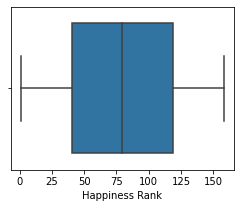

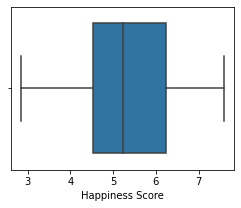

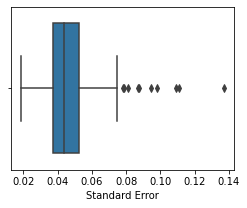

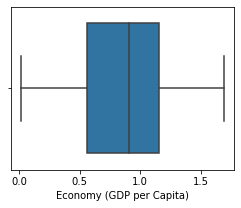

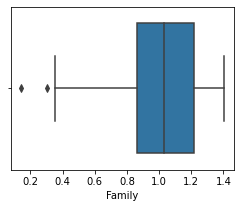

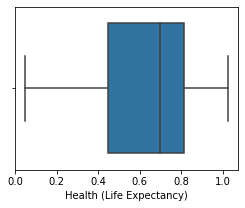

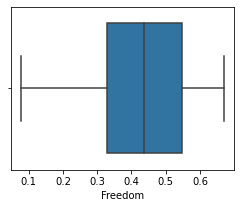

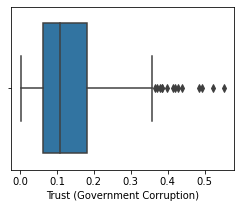

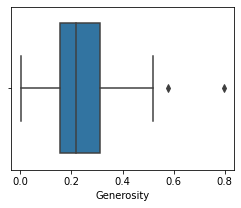

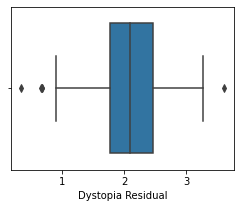

In [27]:
for col in X:
    
    plt.figure(figsize=(4,3))
    sns.boxplot(data[col])

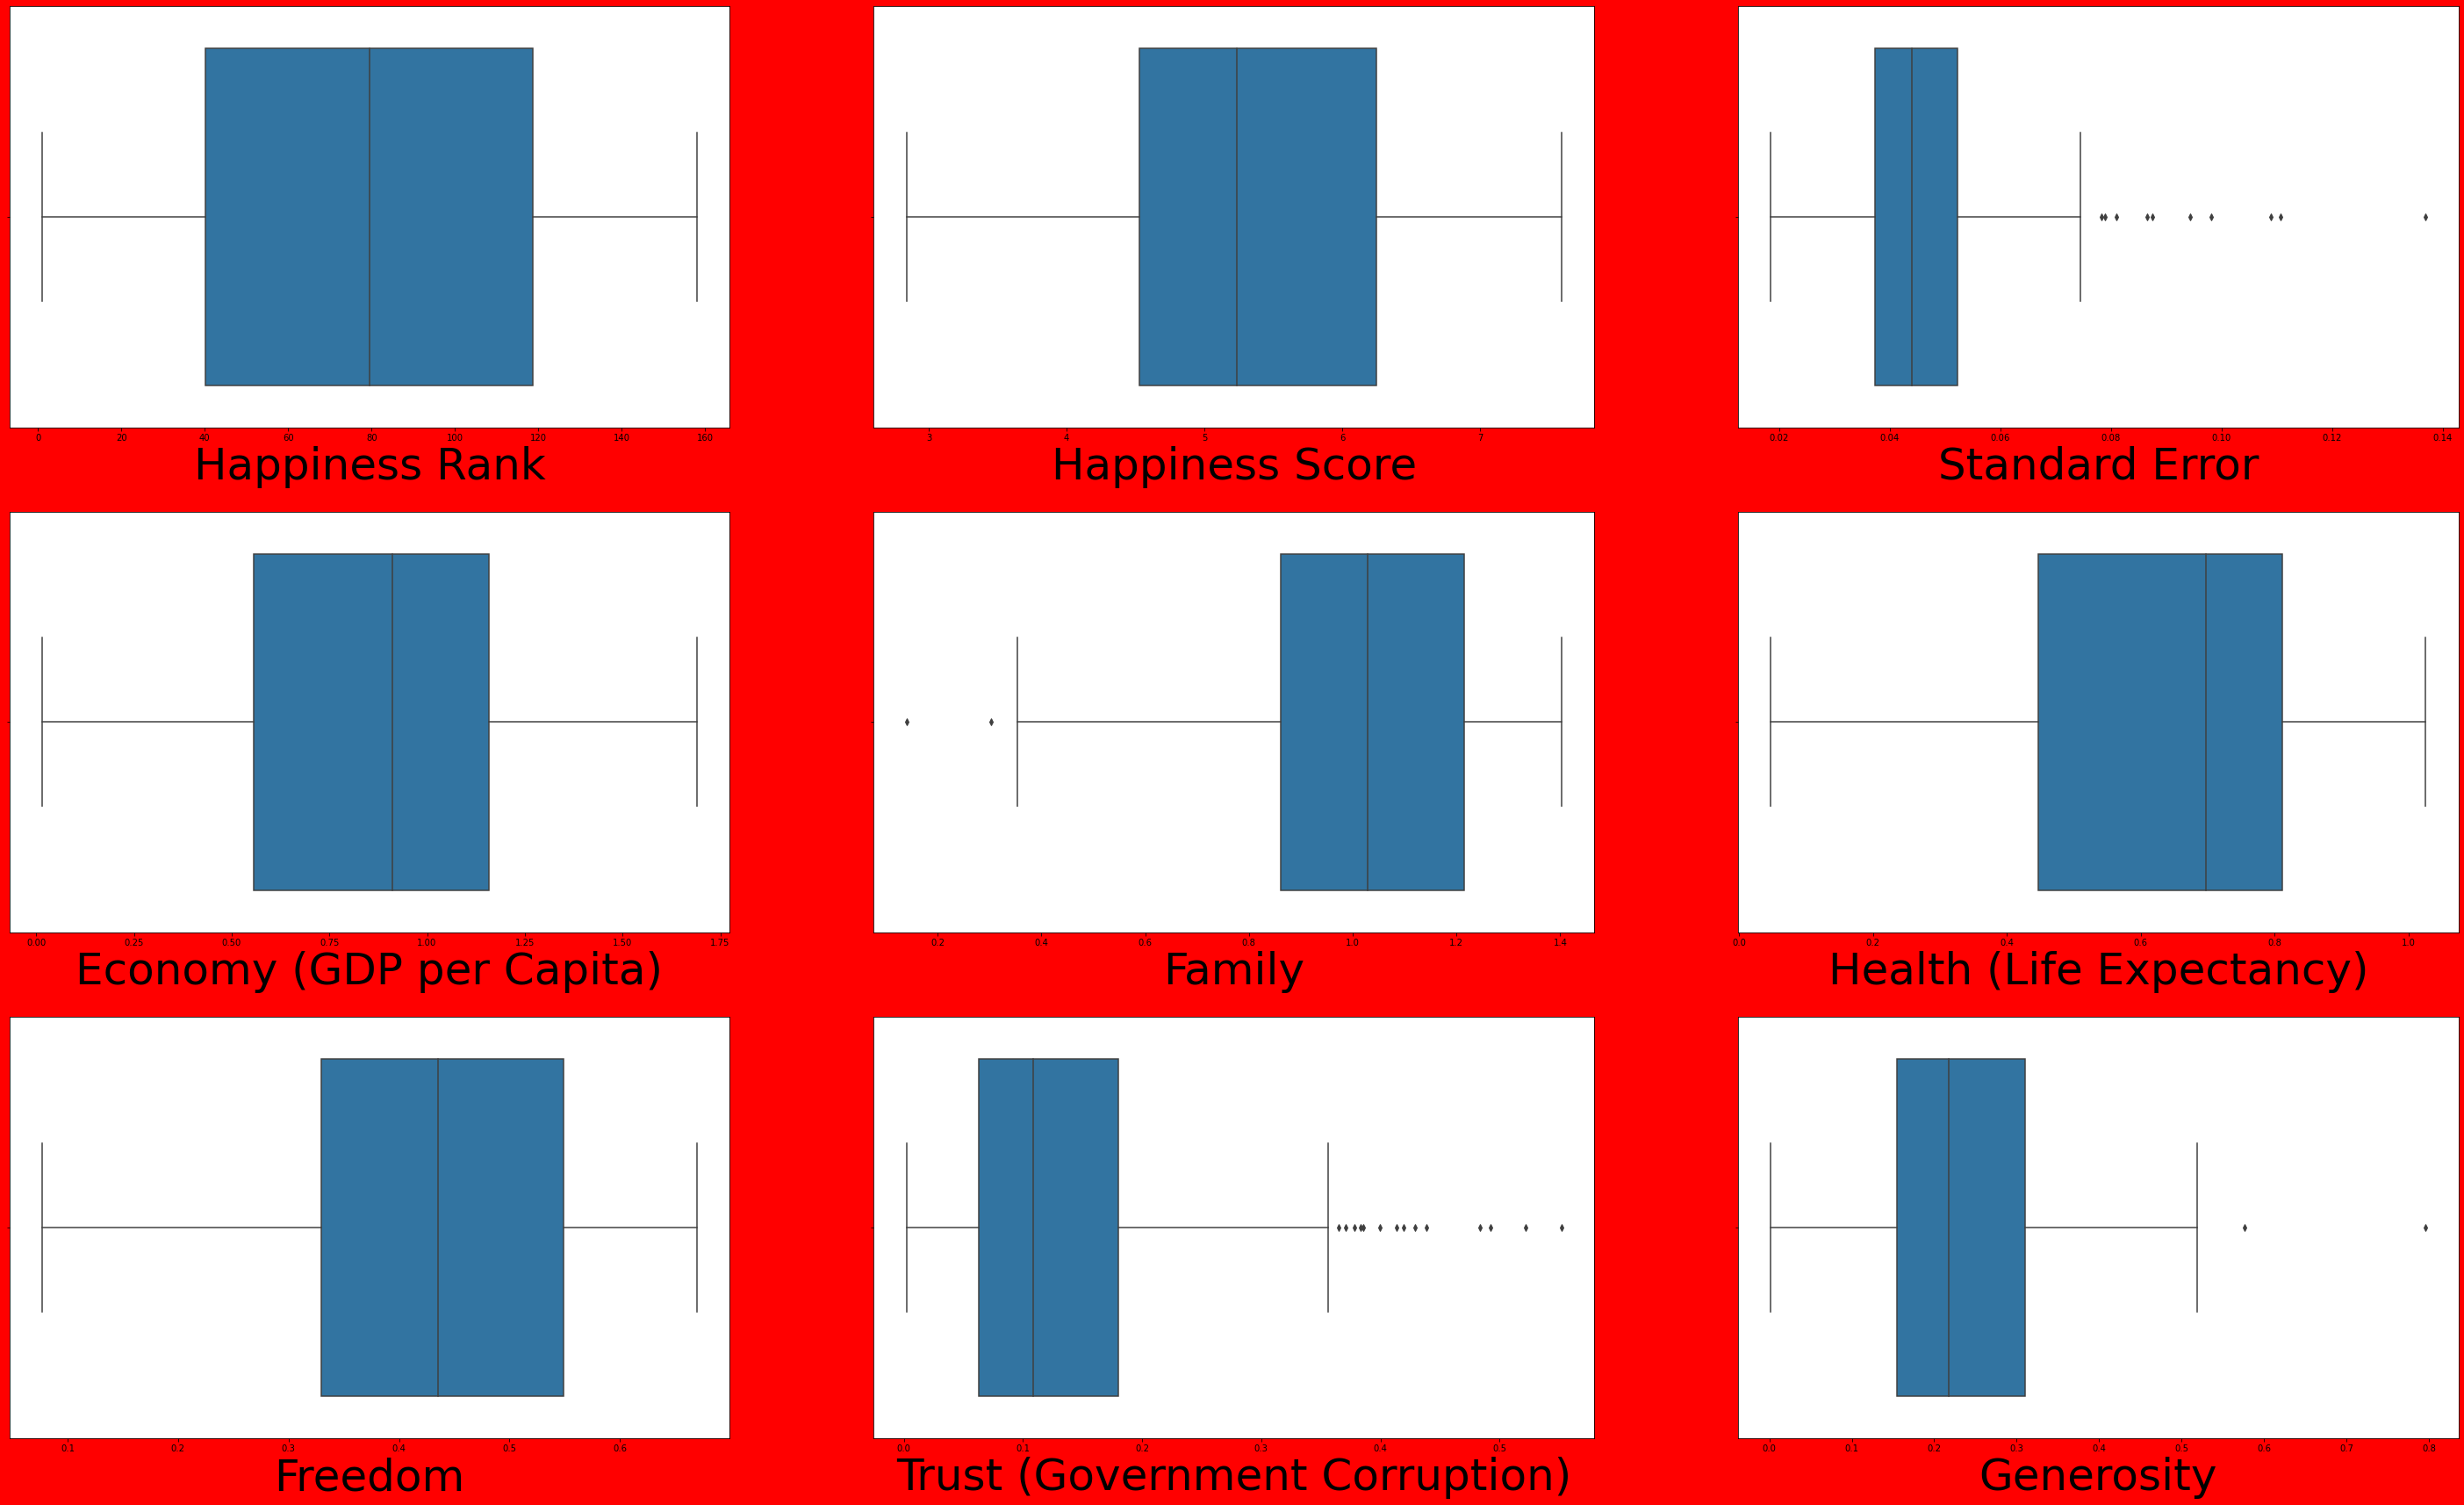

In [28]:
#Lets see how data is distributed for every column
plt.figure(figsize=(50,30), facecolor='red')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=50)
        
    plotnumber+=1
plt.show()

In [29]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(X))
z.shape

(158, 10)

In [30]:

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_cleaned_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

Happiness Rank                   78.500000
Happiness Score                   1.717750
Standard Error                    0.015032
Economy (GDP per Capita)          0.600915
Family                            0.352982
Health (Life Expectancy)          0.363797
Freedom                           0.219490
Trust (Government Corruption)     0.117705
Generosity                        0.154970
Dystopia Residual                 0.703005
dtype: float64


In [31]:

len(data)-len(df_cleaned_iqr)

31

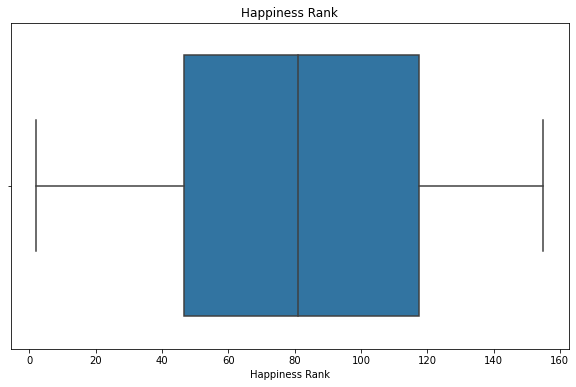

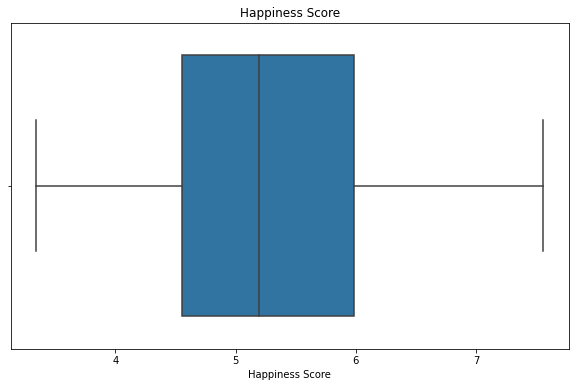

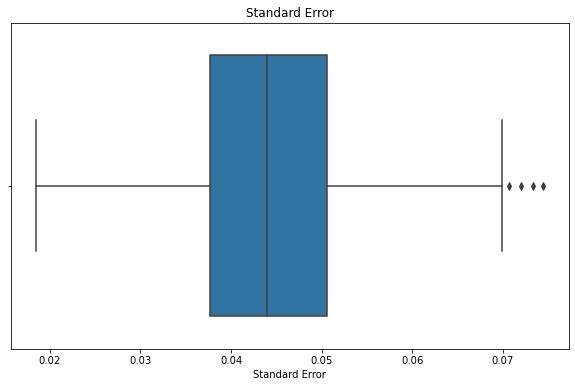

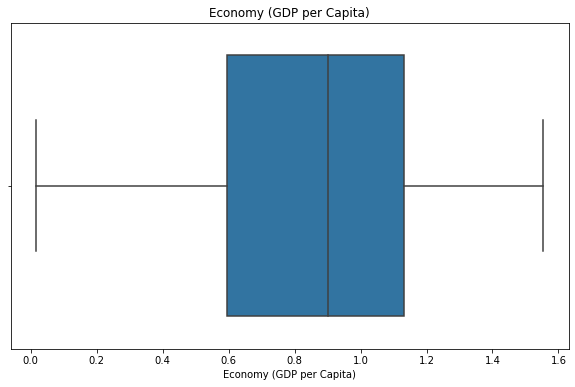

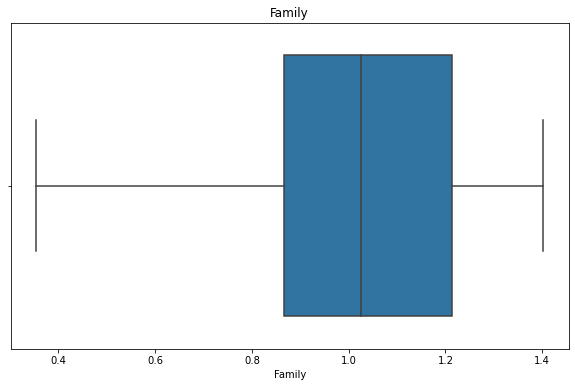

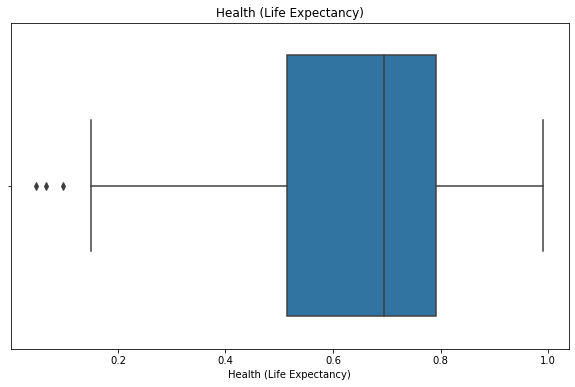

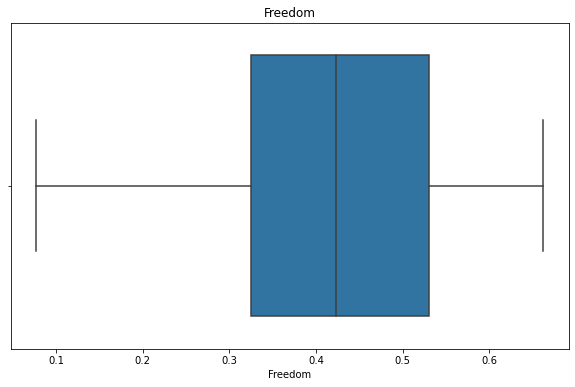

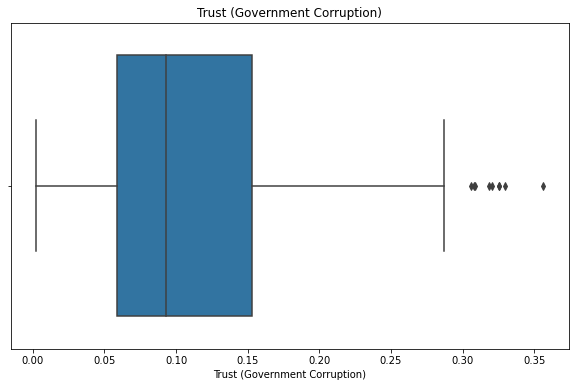

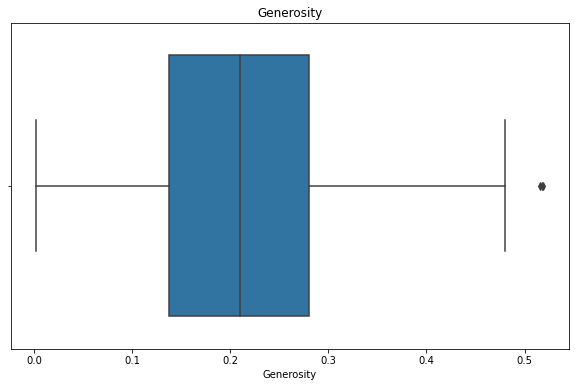

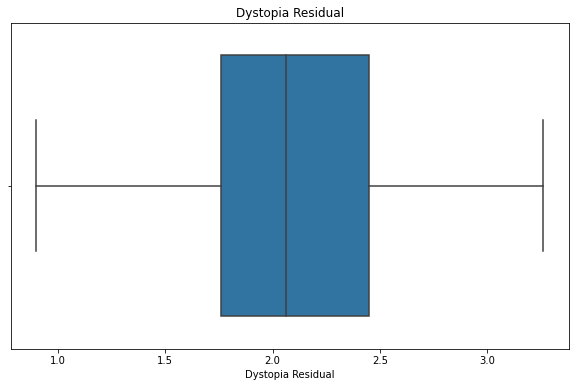

In [32]:
for col in X:
    
    plt.figure(figsize=(10,6))
    plt.title(col)
    sns.boxplot(df_cleaned_iqr[col])

In [33]:
df_cleaned_iqr.skew()

Happiness Rank                  -0.024124
Happiness Score                  0.216851
Standard Error                   0.457832
Economy (GDP per Capita)        -0.404005
Family                          -0.706009
Health (Life Expectancy)        -0.730078
Freedom                         -0.315837
Trust (Government Corruption)    1.099069
Generosity                       0.729035
Dystopia Residual                0.142870
dtype: float64

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

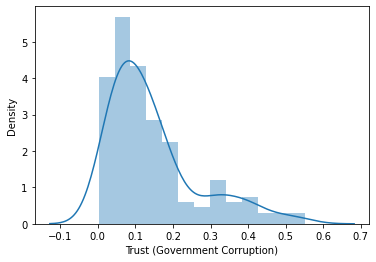

In [34]:
sns.distplot(data['Trust (Government Corruption)'])

In [35]:
q = df_cleaned_iqr['Trust (Government Corruption)'].quantile(0.85)

df_cleaned = df_cleaned_iqr[data['Trust (Government Corruption)']<q]

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

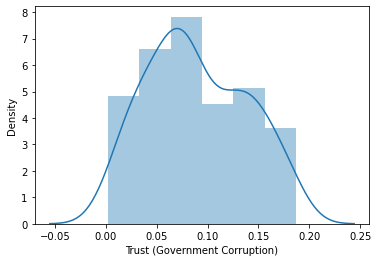

In [36]:
sns.distplot(df_cleaned['Trust (Government Corruption)'])

In [37]:
df_cleaned.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
10,Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
11,Costa Rica,Latin America and Caribbean,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
12,Austria,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [38]:
len(data.Country.unique())

158

In [39]:
len(data.Region.unique())

10

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

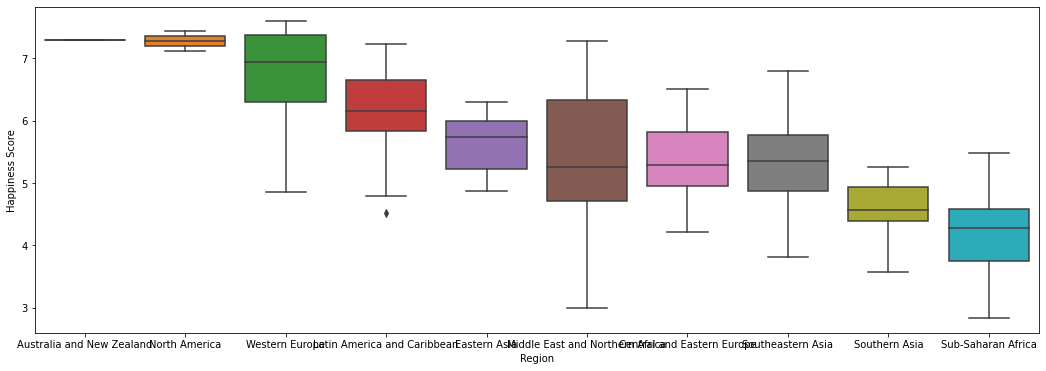

In [40]:
# let's get the avg happiness rank across thhere 10 regions
plt.figure(figsize=(18,6))
region_order_wrt_score = data.groupby('Region').agg({'Happiness Score':'mean'}).sort_values('Happiness Score',ascending=False).index
sns.boxplot(data.Region,data['Happiness Score'],order=region_order_wrt_score)

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

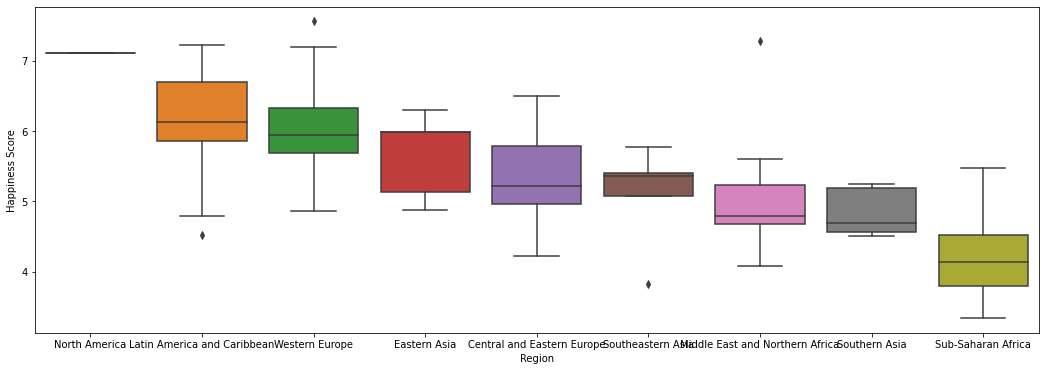

In [41]:

# This is plotting if the dataframe without outliers.
# The outlier region is Australia and Newzealand as shown in the above plot.

plt.figure(figsize=(18,6))
region_order_wrt_score = df_cleaned.groupby('Region').agg({'Happiness Score':'mean'}).sort_values('Happiness Score',ascending=False).index
sns.boxplot(df_cleaned.Region,df_cleaned['Happiness Score'],order=region_order_wrt_score)

In [42]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


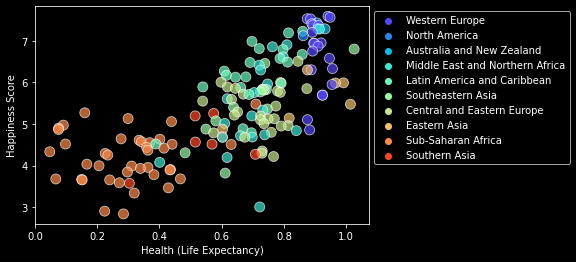

In [46]:

# is health related to you happiness ...let's find out!
plt.style.use('dark_background')
sns.scatterplot(data['Health (Life Expectancy)'],data['Happiness Score'],hue=data.Region,palette='rainbow',s=100,alpha=0.7)
plt.legend(bbox_to_anchor=(1,1))

In [52]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [53]:

# Fortunately there is no significate relation of Government Corruption with  the Economy of the country
# Au contrair...there's some datapoints showing that trust(gov corruption) actually benefits the Economy of the country!

In [54]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [55]:
# let's get the correlation of the features with each other
data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.784589,-0.730632,-0.735669,-0.558693,-0.374948,-0.156037,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.782060,0.738261,0.727199,0.572188,0.397175,0.176914,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.229558,-0.107501,-0.294902,-0.128462,-0.188923,-0.087525,0.083981
Economy (GDP per Capita),-0.784589,0.782060,-0.229558,1.000000,0.637690,0.794476,0.373328,0.305694,-0.000354,0.059456
Family,-0.730632,0.738261,-0.107501,0.637690,1.000000,0.508066,0.471183,0.206277,0.089582,0.182113
Health (Life Expectancy),-0.735669,0.727199,-0.294902,0.794476,0.508066,1.000000,0.373434,0.247248,0.121330,0.031714
Freedom,-0.558693,0.572188,-0.128462,0.373328,0.471183,0.373434,1.000000,0.510124,0.350630,0.059583
Trust (Government Corruption),-0.374948,0.397175,-0.188923,0.305694,0.206277,0.247248,0.510124,1.000000,0.284375,-0.036503
Generosity,-0.156037,0.176914,-0.087525,-0.000354,0.089582,0.121330,0.350630,0.284375,1.000000,-0.108955
Dystopia Residual,-0.521999,0.530474,0.083981,0.059456,0.182113,0.031714,0.059583,-0.036503,-0.108955,1.000000


<AxesSubplot:>

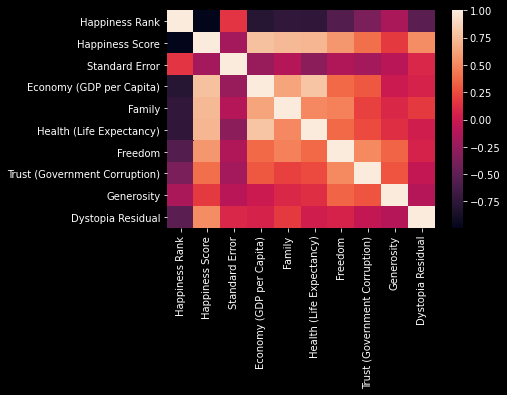

In [57]:
# get a heatmap
sns.heatmap(data.corr())

In [62]:
# get the correalation of the features wrt to the traget variables
df_cleaned.corr()['Happiness Score']

Happiness Rank                  -0.993416
Happiness Score                  1.000000
Standard Error                  -0.053471
Economy (GDP per Capita)         0.715162
Family                           0.633132
Health (Life Expectancy)         0.716582
Freedom                          0.358598
Trust (Government Corruption)    0.076991
Generosity                       0.090395
Dystopia Residual                0.580171
Name: Happiness Score, dtype: float64

In [63]:

# happiness rand is highly negatively correalated with the Score ..because
# higher the score ...lower the rank

In [64]:
# We should drop the column as it's almost perfectly correalted to the target
df_cleaned.drop('Happiness Rank',1,inplace=False)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
10,Israel,Middle East and Northern Africa,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
11,Costa Rica,Latin America and Caribbean,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
12,Austria,Western Europe,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
14,United States,North America,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
...,...,...,...,...,...,...,...,...,...,...,...
148,Chad,Sub-Saharan Africa,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [65]:
from sklearn.preprocessing import LabelEncoder


In [66]:
leb_enc = LabelEncoder()


In [67]:
df = leb_enc.fit_transform(df_cleaned['Country'])
pd.Series(df)

0       43
1       48
2       25
3        5
4      102
      ... 
103     19
104     39
105     50
106     15
107      8
Length: 108, dtype: int32

In [68]:
df_cleaned['Country'] = df

In [69]:
df_cleaned

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,43,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
10,48,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
11,25,Latin America and Caribbean,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
12,5,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
14,102,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
...,...,...,...,...,...,...,...,...,...,...,...,...
148,19,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,39,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,50,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,15,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [70]:
df1 = leb_enc.fit_transform(df_cleaned['Region'])
pd.Series(df1)

0      8
1      3
2      2
3      8
4      4
      ..
103    7
104    7
105    7
106    7
107    7
Length: 108, dtype: int32

In [71]:
df_cleaned['Region'] = df

In [72]:
df_cleaned

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,43,43,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
10,48,48,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
11,25,25,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
12,5,5,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
14,102,102,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011
...,...,...,...,...,...,...,...,...,...,...,...,...
148,19,19,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,39,39,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,50,50,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,15,15,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [74]:

# X and y split
X = df_cleaned.drop('Happiness Score',1)
y = df_cleaned['Happiness Score']

In [75]:

# check the shapes
X.shape,y.shape

((108, 11), (108,))

In [76]:

# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=350)

# check size 
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((72, 11), (72,), (36, 11), (36,))

In [77]:
# standard scaling on the feautres
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(np.expand_dims(y_train,1))
y_test = sc.fit_transform(np.expand_dims(y_test,1))

In [78]:

# check size 
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((72, 11), (72, 1), (36, 11), (36, 1))

In [79]:

# Importing the training dependencies
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR

In [80]:
# Import the Evaluation Dependenies
from sklearn.metrics import r2_score,mean_squared_error

In [81]:
def train_n_ret_r2score(model):
    """
    Input the model and get the r2 score in return.
    """
    model.fit(X_train,y_train.ravel())
    
    return r2_score(y_test,model.predict(X_test))

def train_n_mse(model):
    """
    Input the model and get the mse in return.
    """
    model.fit(X_train,y_train.ravel())
    
    return mse(y_test,model.predict(X_test))

def get_avg_cv_score(model):
    """
    Input the model and get the average cv score with scoring param:'r2' on the complete dataset with 10 Folds.
    """
    return np.mean(cross_val_score(model,X,y,cv=KFold(10,shuffle=True,random_state=42)))

In [82]:
# Simple linear Model:

train_n_ret_r2score(LinearRegression())

0.9791248778877836

In [83]:

best_model = LinearRegression()
best_model.fit(X_train,y_train)
best_model.score(X_test,y_test)

# getting the pred values
best_y_preds = best_model.predict(X_test)

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [85]:
cross_val_score(best_model,X,y,cv=KFold(10,shuffle=True))

array([0.9948586 , 0.90497402, 0.98945346, 0.99771181, 0.98515044,
       0.99296655, 0.9849147 , 0.9900923 , 0.96556246, 0.99627226])

In [86]:
np.mean(cross_val_score(best_model,X,y,cv=KFold(10,shuffle=True)))

0.9841462154083155

In [87]:

mean_squared_error(y_test,best_y_preds)

0.020875122112216402

In [88]:
# Linear model is giving us the 96 percent on the r2 score..and moreover its giving a perfect CVscore on the 10 Fold Cross Validation data.

In [89]:
import statsmodels.api as sm


In [90]:
# OLS regression results
res = sm.OLS(y,X).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.502e+04
Date:                Sun, 04 Jul 2021   Prob (F-statistic):                   2.35e-151
Time:                        22:45:46   Log-Likelihood:                          63.903
No. Observations:                 108   AIC:                                     -107.8
Df Residuals:                      98   BIC:                                     -80.98
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

<AxesSubplot:>

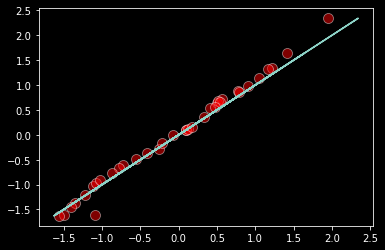

In [91]:
plt.plot(y_test,y_test)
#plt.plot(best_y_preds.ravel(),y_test.ravel(),color='r')
sns.scatterplot(best_y_preds.ravel(),y_test.ravel(),color='r',s=100,alpha=0.5)